<a href="https://colab.research.google.com/github/uhoney0214/CBO/blob/main/LHS_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

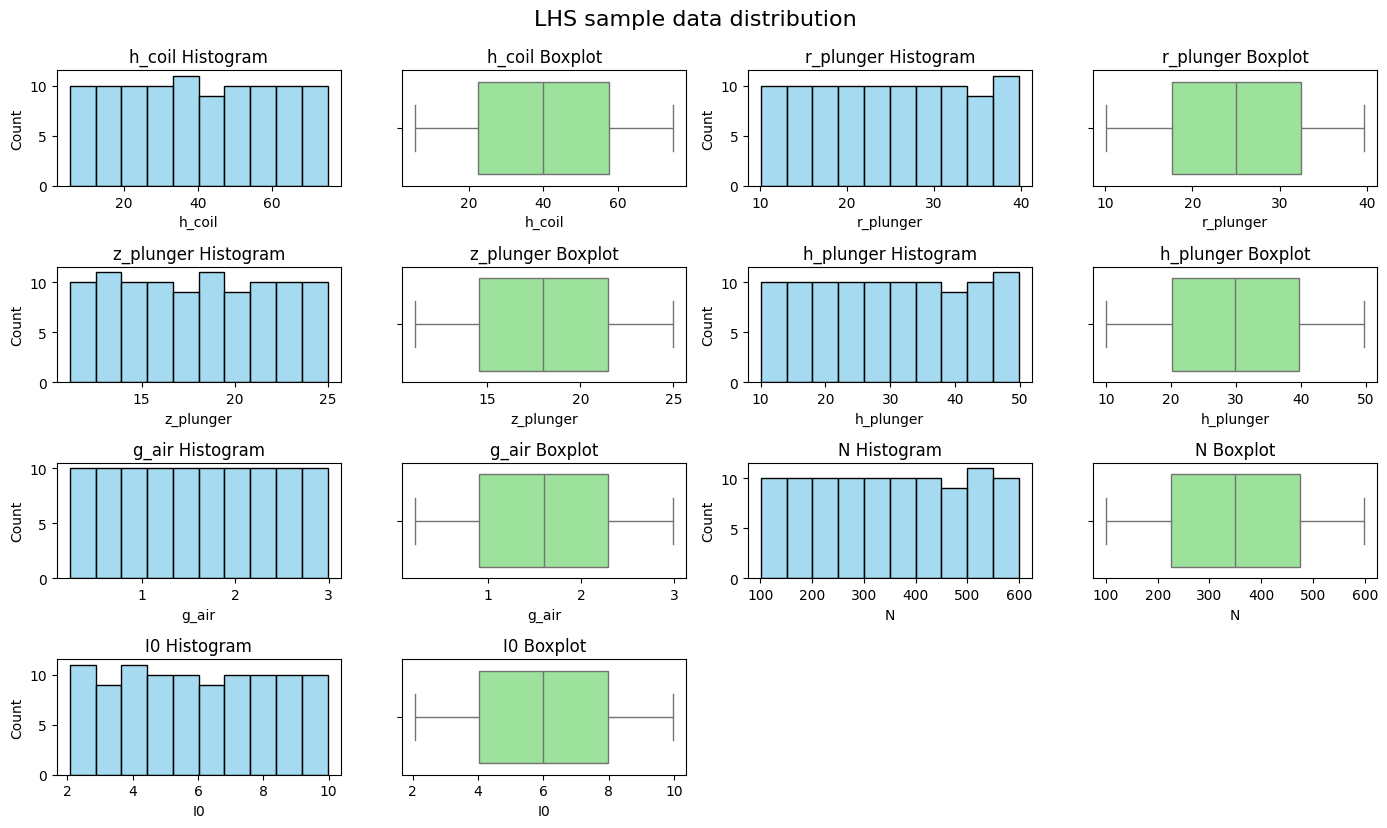

           h_coil   r_plunger   z_plunger   h_plunger       g_air           N  \
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    40.001916   24.991815   18.006139   29.980993    1.600446  349.810000   
std     20.329493    8.702001    4.062143   11.622426    0.811694  145.302658   
min      5.470903   10.113398   11.134603   10.051863    0.220244  101.000000   
25%     22.458216   17.604581   14.547668   20.090022    0.904808  226.250000   
50%     39.865466   24.996369   17.989692   29.823428    1.604756  350.000000   
75%     57.607509   32.407770   21.462409   39.744803    2.293213  474.750000   
max     74.989060   39.718904   24.988675   49.791370    2.990660  599.000000   

               I0  
count  100.000000  
mean     6.002573  
std      2.322147  
min      2.076167  
25%      4.023648  
50%      5.998171  
75%      7.980518  
max      9.971187  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 설계 변수 정의
bounds = {
    "h_coil":    (5,    75),
    "r_plunger": (10,   40),
    "z_plunger": (11,   25),
    "h_plunger": (10,   50),
    "g_air":     (0.2,  3),
    "N":         (100,  600),
    "I0":        (2,    10),
}

num_samples = 100
dim = len(bounds)
columns = list(bounds.keys())

# 2. LHS 샘플 생성
lhs_unit = np.zeros((num_samples, dim))
for i in range(dim):
    cut = np.linspace(0, 1, num_samples + 1)
    points = np.random.uniform(low=cut[:-1], high=cut[1:], size=num_samples)
    np.random.shuffle(points)
    lhs_unit[:, i] = points

# 3. 실제 값으로 스케일링
lhs_scaled = np.zeros_like(lhs_unit)
for i, key in enumerate(columns):
    low, high = bounds[key]
    lhs_scaled[:, i] = lhs_unit[:, i] * (high - low) + low

df_lhs = pd.DataFrame(lhs_scaled, columns=columns)

# 4. N을 자연수로 변환
df_lhs = pd.DataFrame(lhs_scaled, columns=columns)
df_lhs["N"] = df_lhs["N"].round().astype(int)

# 5. 시각화: 히스토그램과 boxplot
plt.figure(figsize=(14, 8))
for i, col in enumerate(columns):
    plt.subplot(4, 4, 2*i+1)
    sns.histplot(df_lhs[col], kde=False, bins=10, color='skyblue')
    plt.title(f"{col} Histogram")

    plt.subplot(4, 4, 2*i+2)
    sns.boxplot(x=df_lhs[col], color='lightgreen')
    plt.title(f"{col} Boxplot")

plt.tight_layout()
plt.suptitle("LHS sample data distribution", fontsize=16, y=1.03)
plt.show()

# 6. 통계 요약 출력
print(df_lhs.describe())
df_lhs.to_csv("LHS_samples_filtered.csv", index=False)